In [1]:
from datamodule.datamodule_old import DataModule
from distributions.distributions import *
from utils import print_model_size, list_available_models, draw, draw_single

# Dataset
- you have to specify each param of the dataset

In [2]:
name = 'exchange'  # electric
train_size = 0.7
validation_size = 0.15
test_size = 0.15
custom_datamodule = DataModule(name, (train_size, validation_size, test_size))

In [3]:
train_window = 24
test_window = 24
test_horizon = 4
test_stride = 4 # should be equal to the time horizon 
test_delay = 0
train_dm, test_dataloader = custom_datamodule.get_all(
    window=train_window,
    test_window=test_window,
    test_horizon=test_horizon,
    test_stride=test_stride,
    test_delay=test_delay
)

# Model
you have to specify:
- model parameters such as number of nodes and number of feature
- distribution: Gaussian or StudentT
- loss
- perform scaling
- additional parameters if needed

In [7]:
input_size = custom_datamodule.get_channels()
n_nodes = custom_datamodule.get_number_of_nodes()

distribution = GaussianDistribution()  # or StudentTDistribution()

test_loss = 'rmse'  # or 'mae'

perform_scaling = False


In [8]:
from model.net import BaseModelDeepGar
from model.deepGARv1 import DeepGAR

model = DeepGAR(
    input_size=input_size,
    n_nodes=n_nodes,
    distribution=distribution,
    test_loss=test_loss,
    perform_scaling=perform_scaling
)

# list_available_models()

In [9]:
print(model)
print_model_size(model)

DeepGAR(
  (train_loss_fn): NLL()
  (test_loss_fn): RMSE()
  (distribution_sigma): Softplus(beta=1, threshold=20)
  (encoder): Linear(in_features=1, out_features=32, bias=True)
  (node_embeddings): NodeEmbedding(n_nodes=8, embedding_size=32)
  (time): MultiLSTMCell(hidden_size=32)
  (space_time): GraphConvLSTMCell(hidden_size=32)
  (distribution_mu): Linear(in_features=32, out_features=1, bias=True)
  (distribution_presigma): Linear(in_features=32, out_features=1, bias=True)
)
Number of model (DeepGAR) parameters:     83458


# Trainer

In [10]:
import pytorch_lightning as pl
import torch
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00,
    patience=20,
    mode='min'
)
checkpoint_callback = ModelCheckpoint(
    dirpath='logs',
    save_top_k=1,
    monitor='val_loss',
    mode='min',
)
trainer = pl.Trainer(
    max_epochs=400,
    accelerator='cuda' if torch.cuda.is_available() else 'cpu',
    devices = 1,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/marziolunghi/Documents/GitHub/DeepGAR/venv/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(


# Training

In [11]:
if True:
    trainer.fit(model=model, datamodule=train_dm)

/Users/marziolunghi/Documents/GitHub/DeepGAR/venv/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /Users/marziolunghi/Documents/GitHub/DeepGAR/logs exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name                  | Type              | Params
------------------------------------------------------------
0 | train_loss_fn         | NLL               | 0     
1 | test_loss_fn          | RMSE              | 0     
2 | distribution_sigma    | Softplus          | 0     
3 | encoder               | Linear            | 64    
4 | node_embeddings       | NodeEmbedding     | 256   
5 | time                  | MultiLSTMCell     | 66.6 K
6 | space_time            | GraphConvLSTMCell | 16.5 K
7 | distribution_mu       | Linear            | 33    
8 | distribution_presigma | Linear            | 33    
------------------------------------------------------------
83.5 K   

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/Users/marziolunghi/Documents/GitHub/DeepGAR/venv/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


# Testing

In [12]:
best_model_path = 'logs/epoch=32-step=5577.ckpt'

best_model = DeepGAR.load_from_checkpoint(
    checkpoint_path=best_model_path
)
best_model.eval()
res = trainer.predict(model=best_model, dataloaders=test_dataloader)

Predicting: 0it [00:00, ?it/s]

list

# Draw + errors

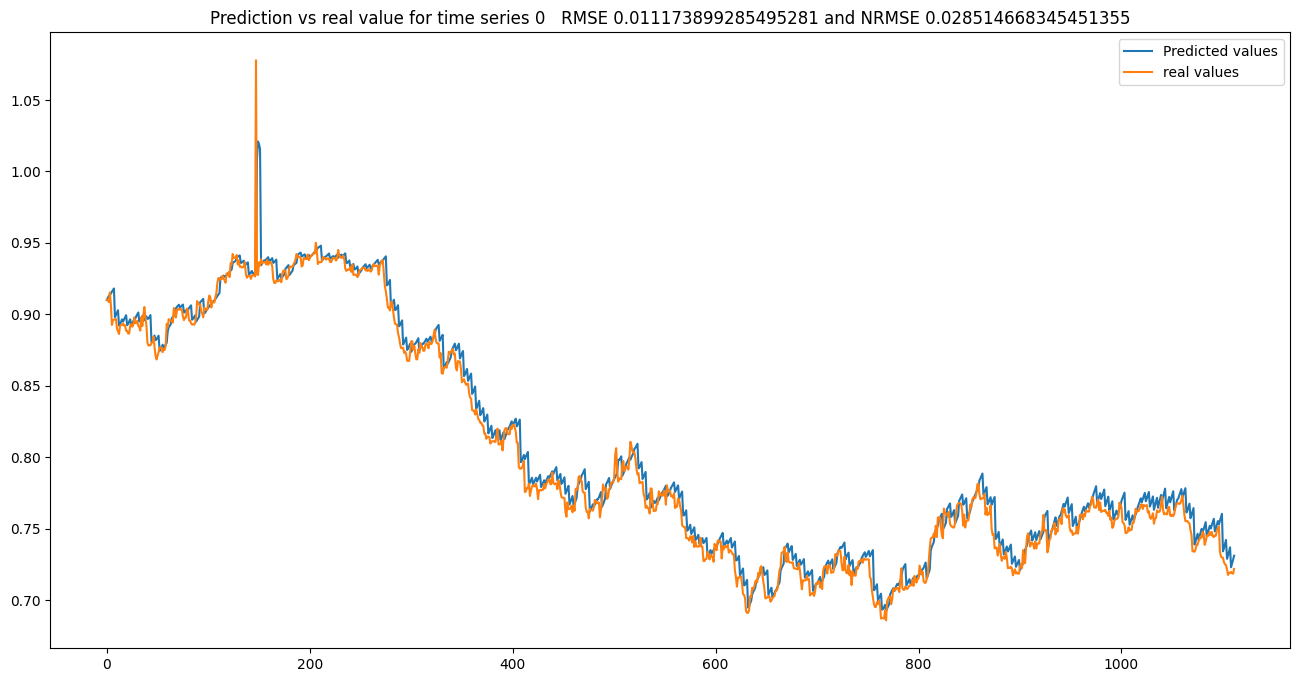

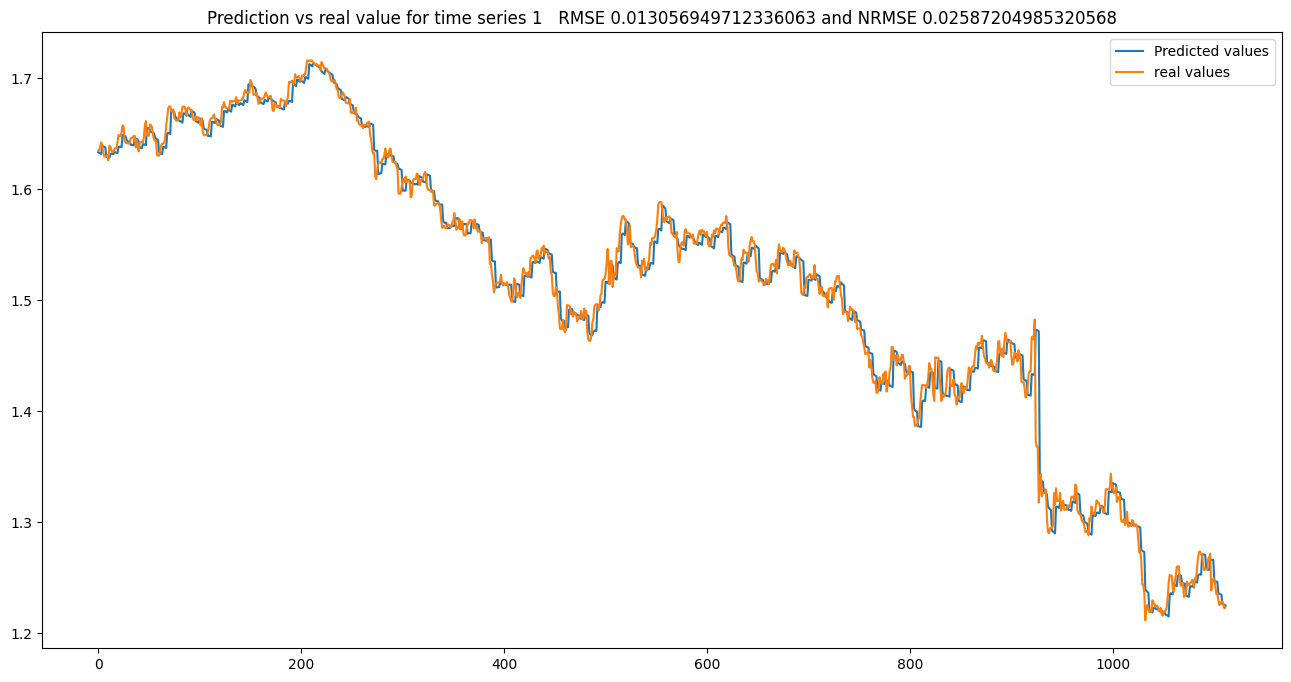

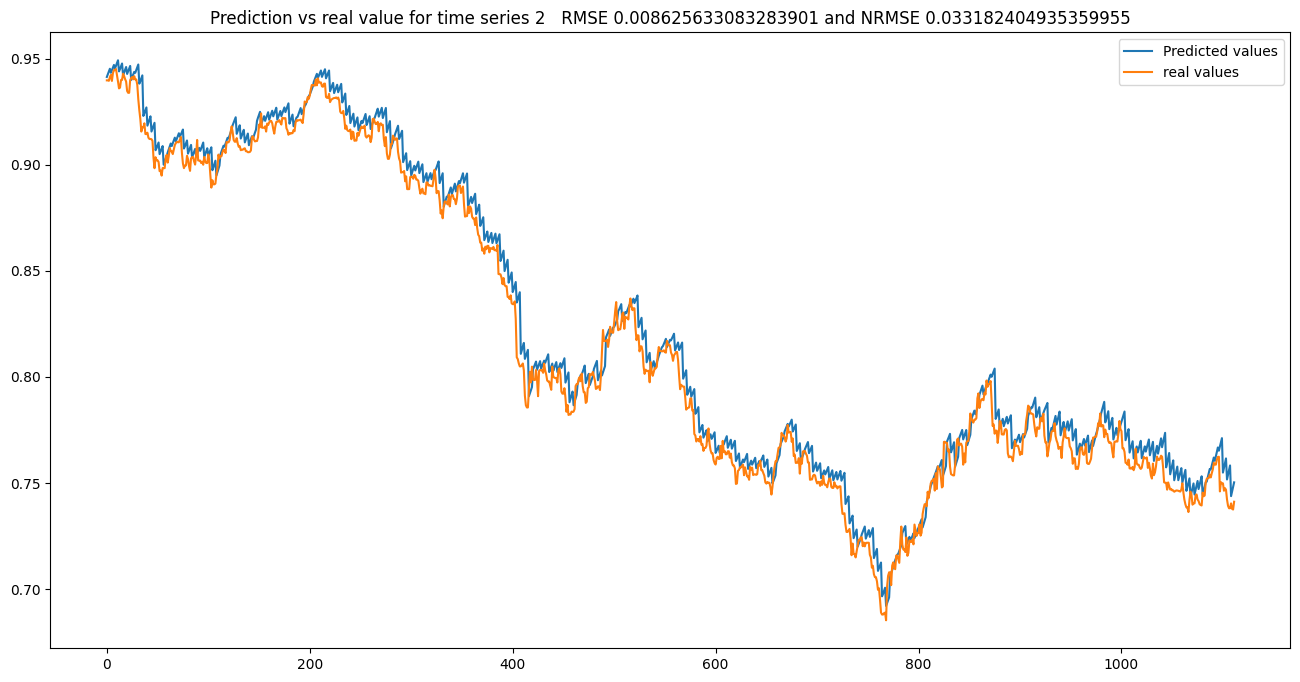

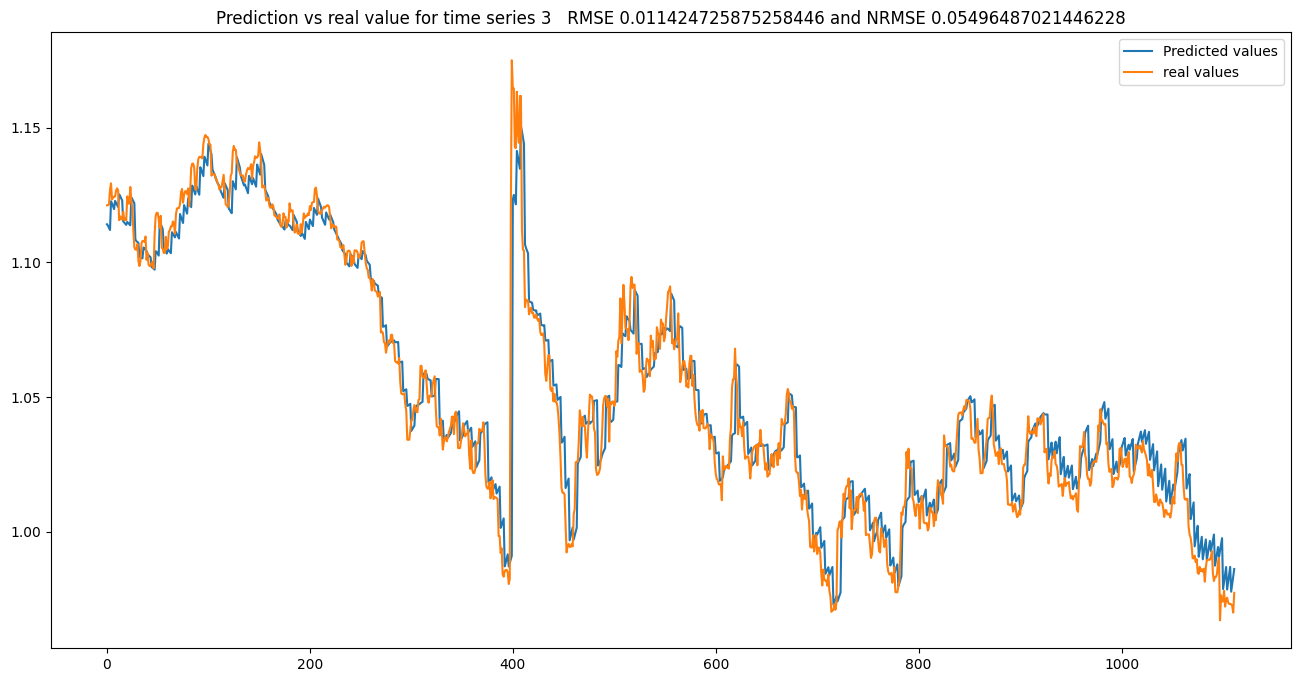

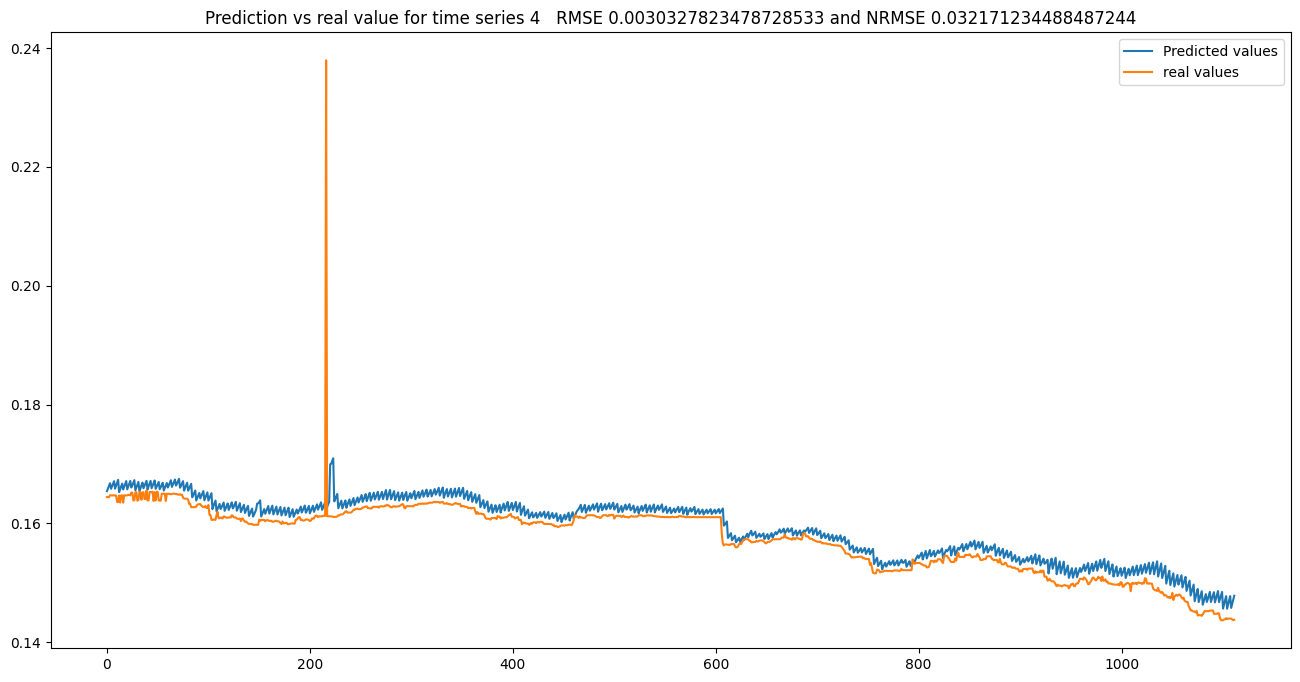

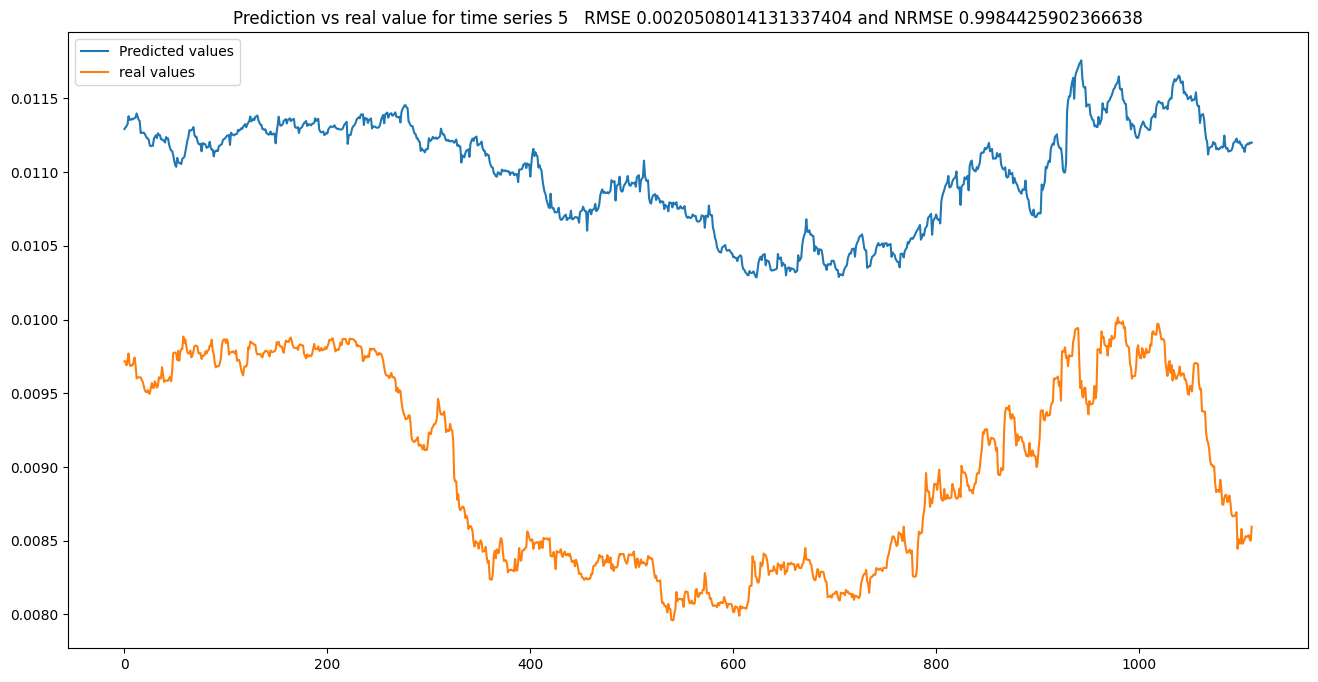

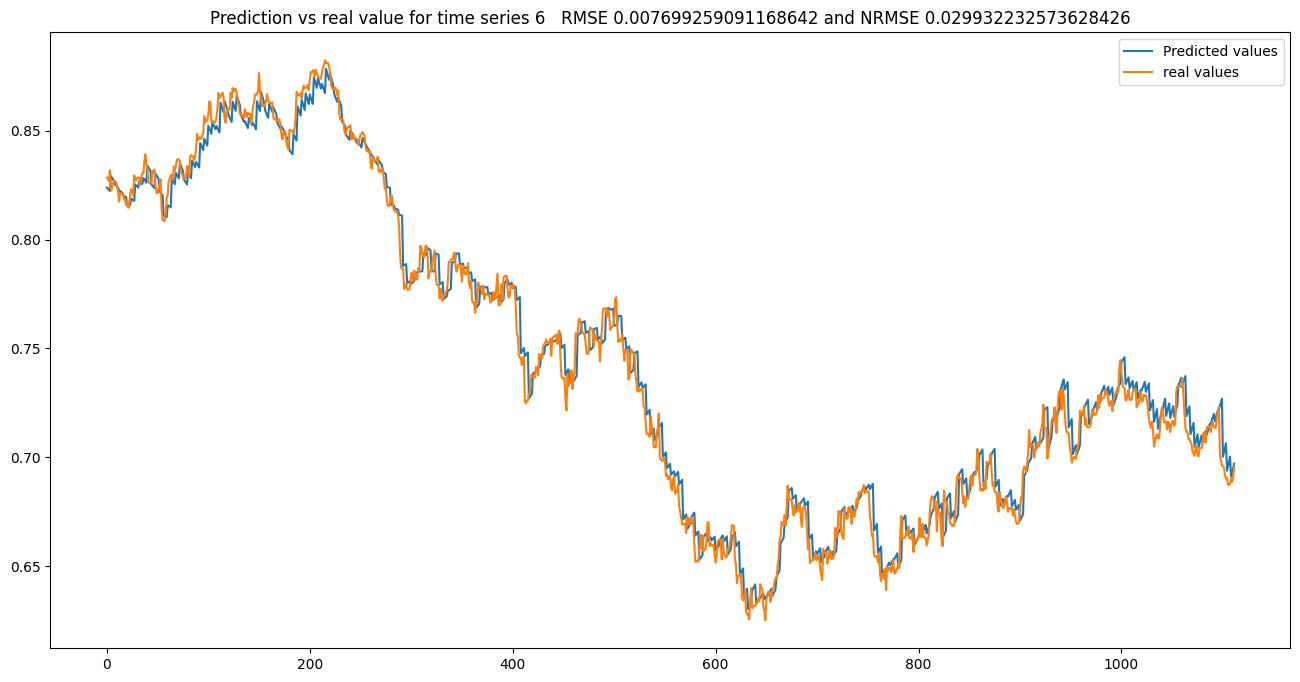

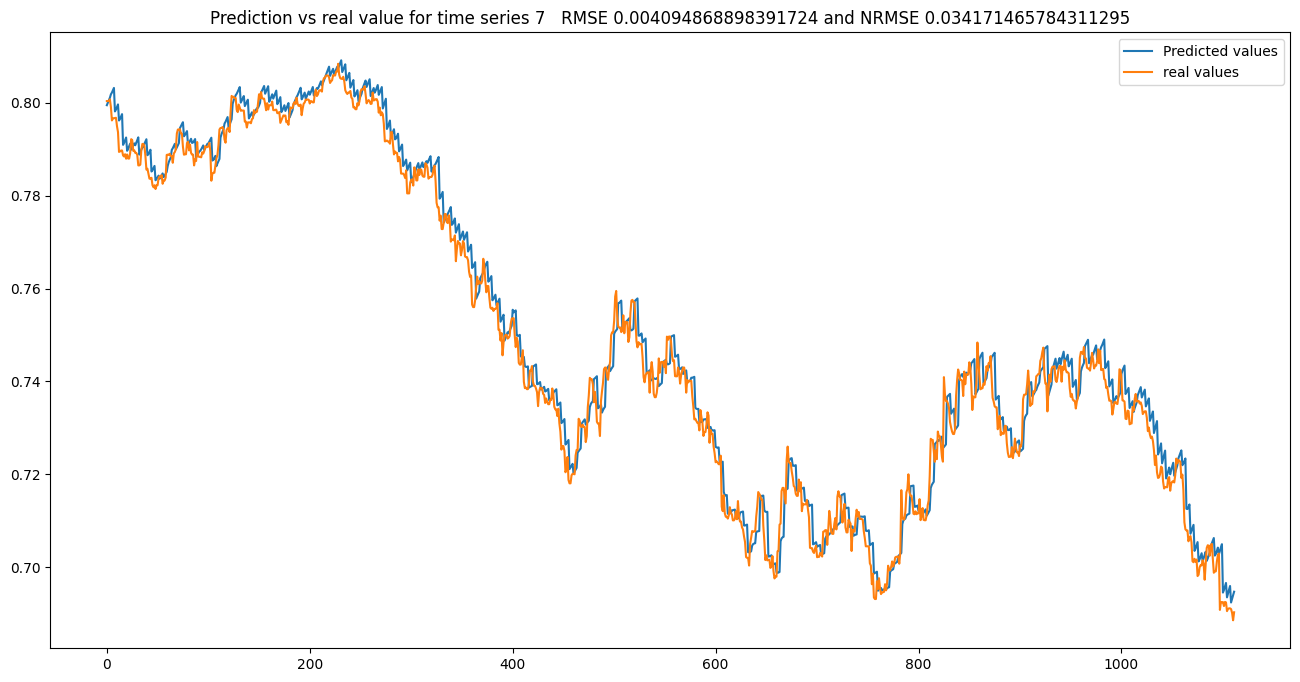

In [13]:
draw(res)

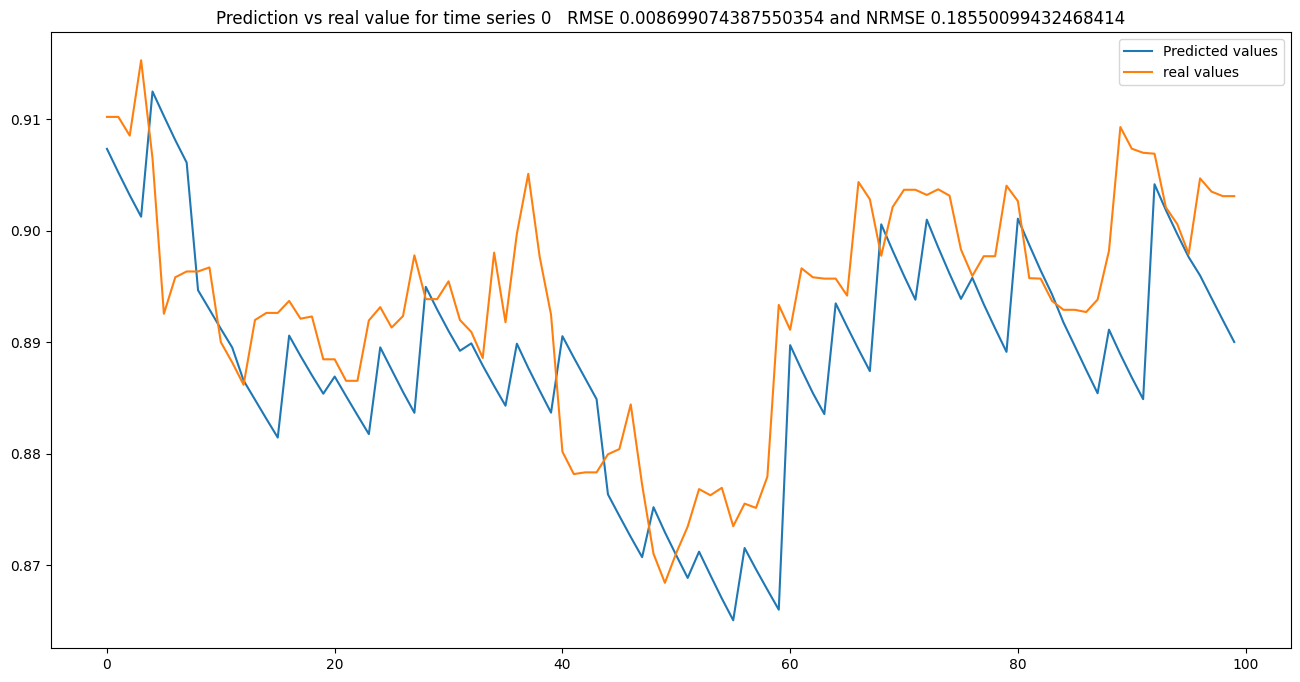

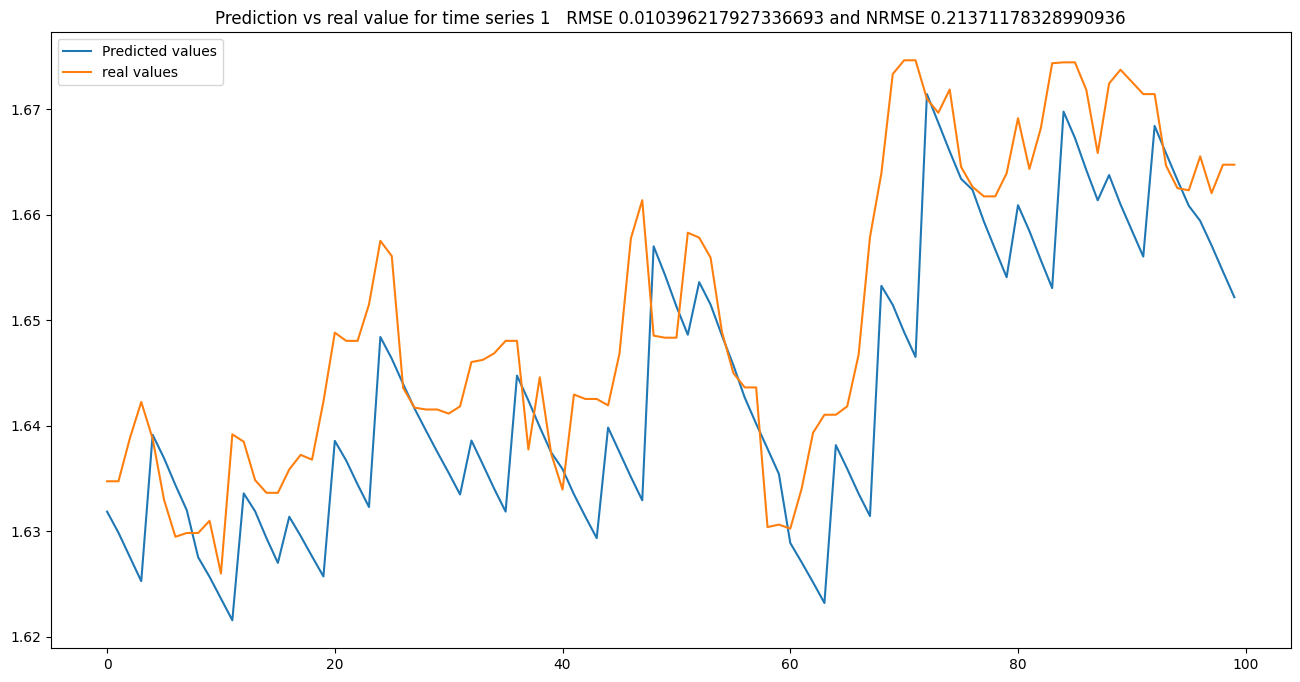

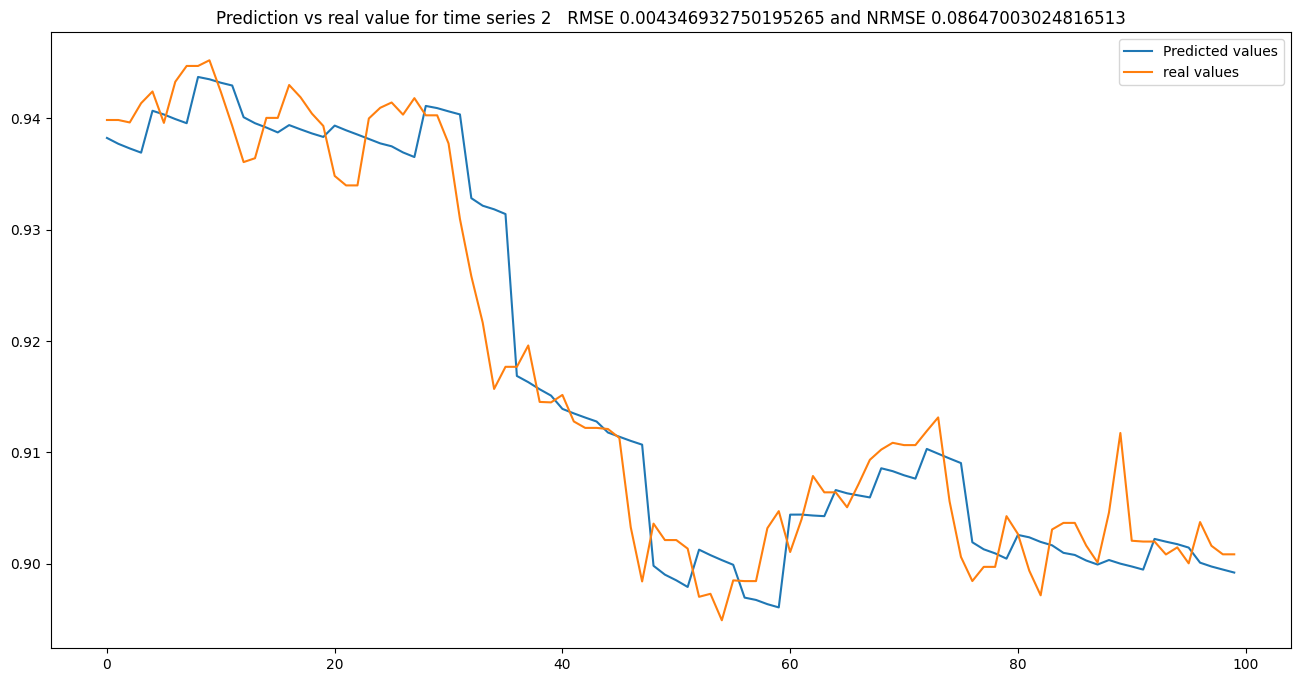

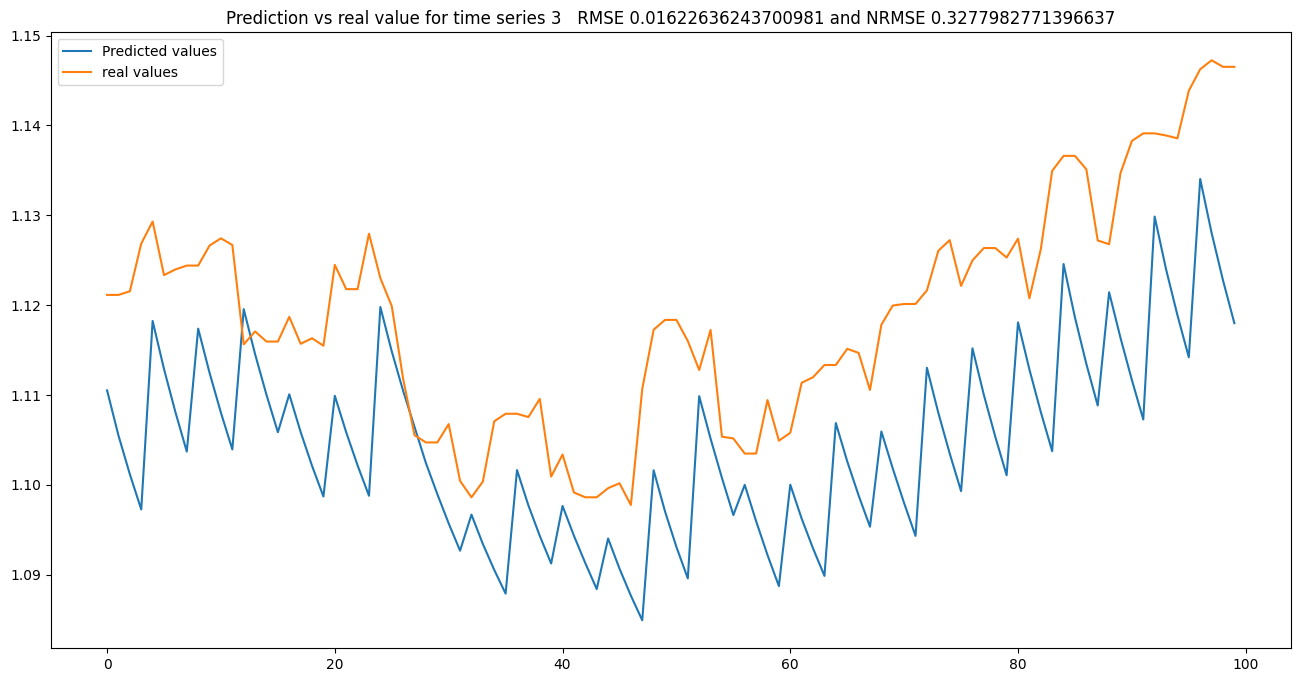

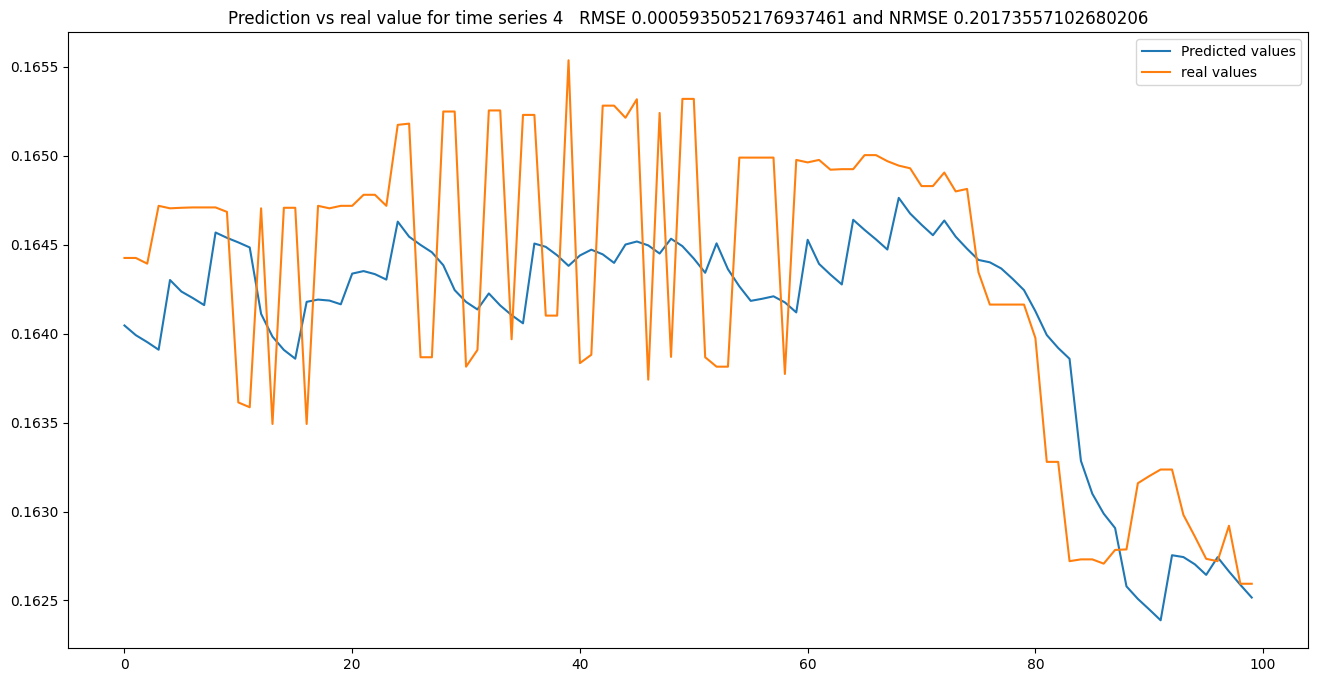

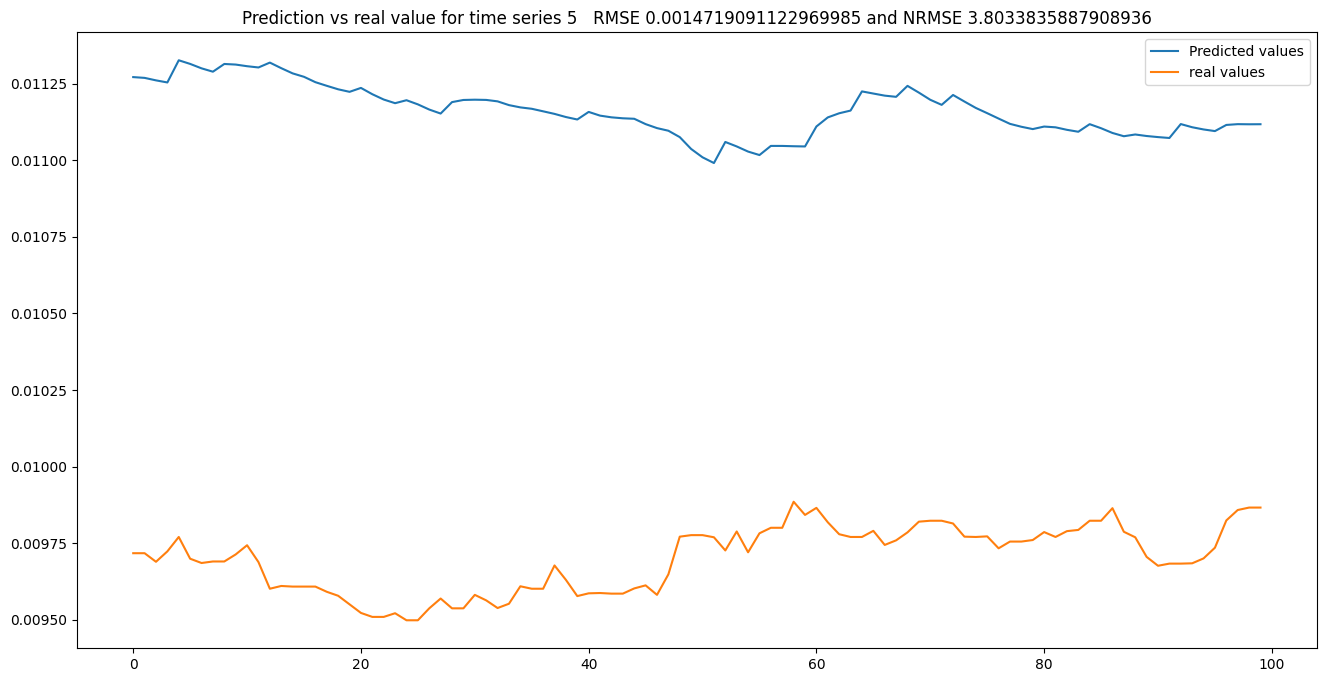

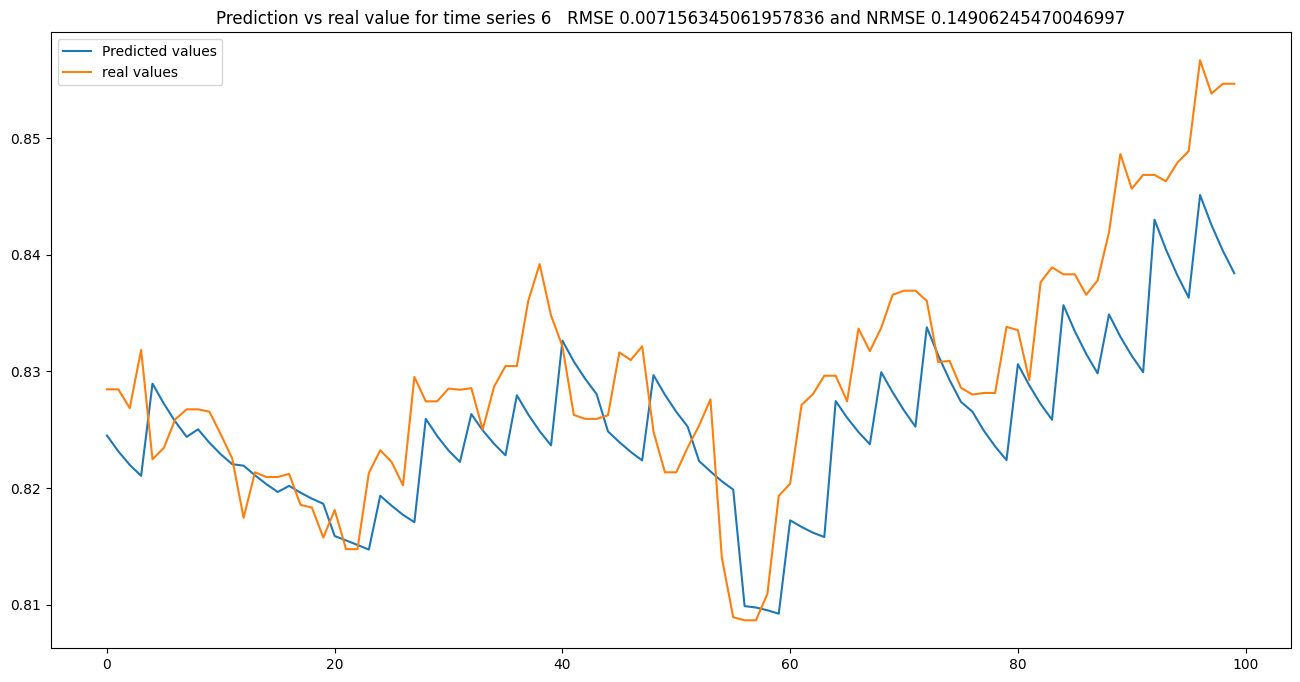

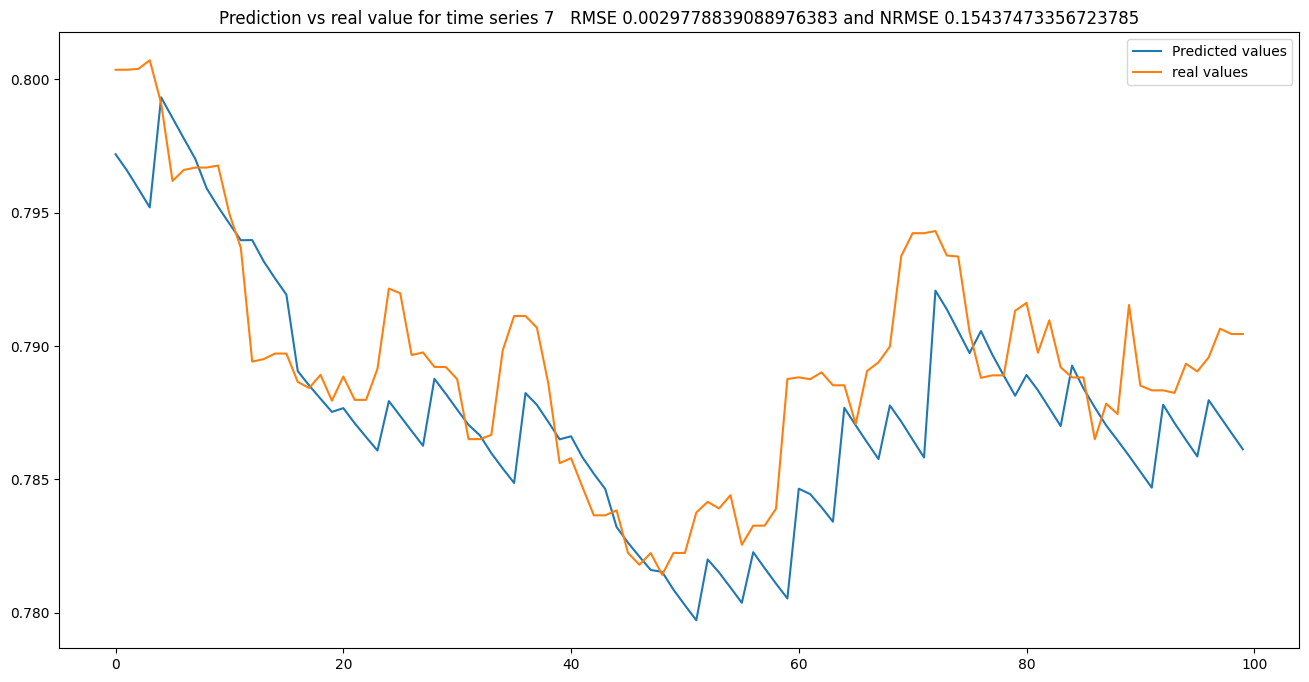

In [17]:
interval =int(100/4)
draw(res[:interval])